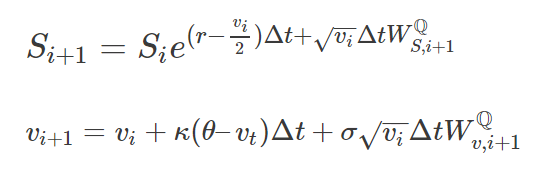



In [7]:
#closed form solution using Euler discretization given above
import numpy as np
import matplotlib.pyplot as plt

S0 = 100.0            
# asset price
T = 1.0   
# time in years
N = 252
# number of steps
delta_t= T/N
# interval between steps
r = 0.04               
# risk free interest rate
N_S = 5000              
# number of simulations
v0=0.5
# initial variance
k = 3             
# rate of mean reversion of variance
theta = 0.3      
# long-term variance        
sigma = 0.6            
# volatility of volatility
rho = 0.8
# correlation between stock return and variance
mean= np.array([0,0])
#mean of the 2 dimensional distrubution
cov= np.array([[1,rho],[rho,1]])
# Covariance matrix of the distribution
W= np.random.multivariate_normal(mean, cov, (N,N_S))
# getting an array of values for each simulation run

In [8]:
def heston_model(S0,r,v0, T,N,N_S,k, theta, sigma):
    S= np.full(shape=(N+1,N_S), fill_value= S0)
    v= np.full(shape=(N+1,N_S), fill_value=v0)
    for i in range(0, N):
        S[i+1] = S[i] * np.exp( (r - 0.5*v[i])*delta_t + np.sqrt(v[i] * delta_t) * W[i,:,0] )
        v[i+1] = np.maximum(v[i] + k*(theta-v[i])*delta_t + sigma*np.sqrt(v[i]*delta_t)*W[i,:,1],0)
        
    return S,v

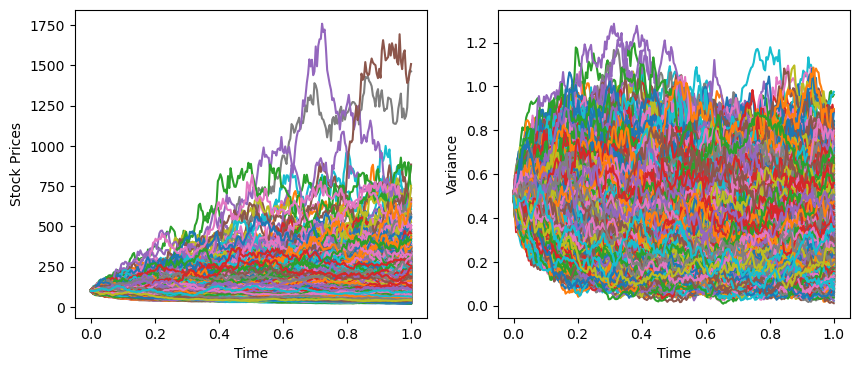

In [14]:
S,v = heston_model(S0, r,v0, T,N, N_S,k, theta, sigma)

fig, (ax1, ax2)  = plt.subplots(1,2, figsize=(10,4))
time = np.linspace(0,T,N+1)
ax1.plot(time,S)
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock Prices')

ax2.plot(time,v)
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')

plt.show()